In [1]:
import cv2, numpy, time
from imutils.video import WebcamVideoStream, FPS
%matplotlib inline
import matplotlib as plt

In [2]:
class Brick():
    def __init__(self, color=None, part_id=None, p_fall1=None, p_fall2=None, img = None):
        self.color = color
        self.part_id = part_id
        self.p_fall1 = p_fall1
        self.p_fall2 = p_fall2
        self.p_length = p_fall1 - p_fall2
        self.img = img
white_img = numpy.full((480, 640, 3), 255)
min_white = numpy.array([170, 170, 160])
white_px = numpy.array([255, 255, 255])
def conveyor_to_white(inp):
    sh = inp.shape
    for x in range(sh[1]):
        for y in range(sh[0]):
            if numpy.all(inp[y, x] >= min_white):
                inp[y, x] = white_px
    return inp
def conveyor_to_white2(inp):
    con = inp[:, :, 0] > 160# and inp[:, :, 1] > 170 and inp[:, :, 2] > 170
    inp[con] = [255, 255, 255]
    return inp

def auto_crop(inp):
    sh = inp.shape
    mask = (inp == white_img)
    xs = []
    ys = []
    for x in range(sh[1]):
        if numpy.all(mask[:, x]):
            xs.append(x)
    x1 = min(xs)
    x2 = max(xs)
    for y in range(sh[0]):
        if numpy.all(mask[y, :]):
            ys.append(y)
    y1 = min(ys)
    y2 = max(ys)
    return inp[x1:x2, y1:y2], (x1, x2, y1, y2)

def check_on_brick(inp):
    cr, a = auto_crop(inp)
    x1, x2, y1, y2 = a
    h, w, d = inp.shape
    print(a)
    if h/6 < x1:#linker rand
        if h - (h/6) > x2:#rechter rand
            if y1 > 5 and h-y1 > 5:
                return cr
    return False


In [5]:
vstream = WebcamVideoStream(src=0).start()

In [6]:
frames = []
n = 500
start = time.perf_counter()
for i in range(n):
    frames.append(vstream.read())
    time.sleep(1/30)
stop = time.perf_counter()
print(stop-start, (stop-start)/n)

17.059317539032264 0.03411863507806453


0
(0, 639, 0, 479)
1
(0, 639, 0, 479)
2
(0, 639, 0, 479)
3
(0, 639, 0, 479)
4
(0, 639, 0, 479)
5
(0, 639, 0, 479)
6
(0, 639, 0, 479)
7
(0, 639, 0, 479)
8
(0, 639, 0, 479)
9
(0, 639, 0, 479)
10
(0, 639, 0, 479)
11
(0, 639, 0, 479)
12
(0, 639, 0, 479)
13
(0, 639, 0, 479)
14
(0, 639, 0, 479)
15
(0, 639, 0, 479)
16
(0, 639, 0, 479)
17
(0, 639, 0, 479)
18
(0, 639, 0, 479)
19
(0, 639, 0, 479)
20
(0, 639, 0, 479)
21
(0, 639, 0, 479)
22
(0, 639, 0, 479)
23
(0, 639, 0, 479)
24
(0, 639, 0, 479)
25
(0, 639, 0, 479)
26
(0, 639, 0, 479)
27
(0, 639, 0, 479)
28
(0, 639, 0, 479)
29
(0, 639, 0, 479)
30
(0, 639, 0, 479)
31
(0, 639, 0, 479)
32
(0, 639, 0, 479)
33
(0, 639, 0, 479)
34
(0, 639, 0, 479)
35
(0, 639, 0, 479)
36
(0, 639, 0, 479)
37
(0, 639, 0, 479)
38
(0, 639, 0, 479)
39
(0, 639, 0, 479)
40
(0, 639, 0, 479)
41
(0, 639, 0, 479)
42
(0, 639, 0, 479)
43
(0, 639, 0, 479)
44
(0, 639, 0, 479)
45
(0, 639, 0, 479)
46
(0, 639, 0, 479)
47
(0, 639, 0, 479)
48
(0, 639, 0, 479)
49
(0, 639, 0, 479)
50
(0, 639

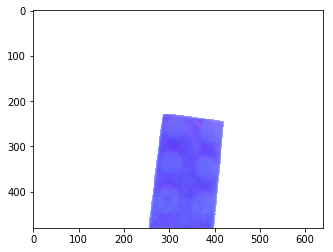

In [4]:
cap = cv2.VideoCapture(0)
out = cv2.VideoWriter('output_test.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 30, (640, 480))
#cap.set(cv2.CAP_PROP_SETTINGS, 0)
cap.set(cv2.CAP_PROP_WHITE_BALANCE_BLUE_U, 2700)
cap.set(cv2.CAP_PROP_WHITE_BALANCE_RED_V, 2700)
cap.set(cv2.CAP_PROP_BRIGHTNESS, 1)
cap.set(cv2.CAP_PROP_EXPOSURE, -11)
#time.sleep(20)
coss = []
for f in range(300):
    print(f)
    ret, fr = cap.read()
    if ret:
        #print(fr.shape)
        #
        fr = conveyor_to_white2(fr)
        co = check_on_brick(fr)
        if co:
            coss.append(co)
            plt.pyplot.imshow(co)
        #
        out.write(fr)
        #time.sleep(0.033333333333333)
    else:
        print(ret)
plt.pyplot.imshow(fr)
out.release()
cap.release()

In [13]:
plt.pyplot.imshow(coss[0])

IndexError: list index out of range

True [[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


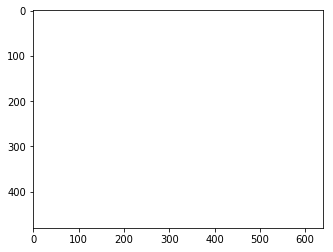

In [3]:
cap = cv2.VideoCapture(0)
cap.set(10, 1)
ret, fr = cap.read()
print(ret, fr)
plt.pyplot.imshow(fr)
cap.release()

In [16]:
(min_white * 3) * 4

array([2040, 2040, 1920])